## 重回帰分析を実施して偏回帰係数で説明変数間の重みを理解する。

[参考サイト](https://di-acc2.com/programming/python/12253/)


# 目的：説明変数の影響度（重み）を算出する。

「自動車の燃費にもっとも影響を与えるものは何か？」 これは統計で重回帰分析を学ぶときによく出てくる課題です。 燃費は1㍑当たりどれだけの距離を走れたかを問います。 少し考えただけでも重量・スピード・路面状況・車種（形状）などの複数の要素が影響すると想像できます。なんとなく回答は分かりますが、数値として表そうとすると難しそうです。なぜなら次のような理由があるからです。
 
- それぞれの要素で単位が異なる。
- 複数の要素が重なり合っている。
 
これに回答を出せるのが重回帰分析で算出できる偏回帰係数です。

重回帰分析の主要な目的は、回帰式を求めてその式に説明変数のある値を与え目的変数がどのように変化する予測するといったものです。そのプロセスの中で偏回帰係数も求まりますから、変数間の影響度（重み）が分かるわけです。そして重回帰分析は「燃費」と同じような数値の目的変数に応用できます。

## サンプルコードの目的
原価データを用いて、特定の商品の利益率が、売上金額・数量・各種費用のなかでどの値が最も影響力があるか数値として把握するため。偏回帰係数を出して重みを出したい。ただし、利益率はプラスとマイナスの数値があるため、出てきた数値をどのように解釈すべきなのか注意が必要。

## データ準備
データを入れる変数名は、df -> df2 -> df3 -> df4 -> df45 -> df46 -> df5 といった形で推移させます。

In [56]:
import pandas as pd
import numpy as np

In [130]:
#dfにはcsvそのまま挿入。
#なおcsvファイルは事前にjupyter notebookのでアップロードしておく。ファイル名でデータ内容、地域、年度、型番が分かるようにする。
df = pd.read_csv("cost_jp_2022_srg.csv", sep="," , encoding='shift_jis')

In [176]:
#df2にカラム名を変更したデータフレームを挿入
df2 = df.rename(columns={
    'JP_売上No'       :'No', 
    'JP_売上金額'     :'Sales',
    'JP_売上数'       :'Quantity',
    'JP00_販管費'     :'Hankan',
    'JP_H0000_変動費' :'Hendo',
    'JP_K0000_固定費' :'Kotei',
    'JP_利益'         :'Rieki',
    'JP_利益率%'      :'Riekiritsu'
})

In [177]:
#df3にNoを削除したデータフレームを入れる。
#drop_colに削除する列をセットする。必要に応じて変更のこと。
drop_col = ["No","Rieki"]
#dropを実施
df3 = df2.drop(drop_col, axis=1)

In [178]:
#df4にデータフレームの各列を正規化したデータを入れる。
df4 = df3.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
df4.head()

,Sales,Quantity,Hankan,Hendo,Kotei,Riekiritsu
0,-0.004216,0.009805,0.006995,-0.000618,0.000674,-0.001237
1,0.007378,0.015940,0.027234,0.016726,0.025895,-0.020550
2,0.004229,0.028210,0.026518,0.014201,0.028478,-0.023769
3,-0.041581,-0.014735,-0.017129,-0.029127,-0.015147,-0.023769
4,0.003443,0.009805,0.010385,-0.001565,0.011900,0.001982


## 重回帰分析を実施

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 値のエラーをチェックして修正

In [180]:
#NaNの場所をチェック
#エラー　ValueError: Input contains NaN, infinity or a value too large for dtype('float64').　が出た場合。
np.where( np.isnan(df4) )

(array([810, 893], dtype=int64), array([5, 5], dtype=int64))

In [181]:
#NaNがあるかどうかチェック
print(np.any(np.isnan(df4)))

True


In [182]:
#df45にはdf4のnanをnumberに変換して挿入
df45 = np.nan_to_num(df4)
df45
#この処置をすると、配列にしてnanからnumへ置き換えをしてみたらx,yに変数をvaluesで入力したところで下記エラーが出た。
#arrayにヘッダー行を挿入したところエラーは解消した。
# IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

array([[-0.00421617,  0.00980519,  0.00699488, -0.00061828,  0.0006738 ,
        -0.00123698],
       [ 0.00737768,  0.01594016,  0.02723352,  0.01672605,  0.02589456,
        -0.02055029],
       [ 0.00422931,  0.02821009,  0.02651796,  0.01420142,  0.02847812,
        -0.02376917],
       ...,
       [-0.03620075, -0.00859972, -0.0150258 , -0.02220178, -0.01154834,
        -0.0285975 ],
       [-0.03023877, -0.00246475, -0.01098333, -0.01557659, -0.0072738 ,
        -0.02752453],
       [-0.03620075, -0.00859972, -0.01544474, -0.02243948, -0.01280637,
        -0.02430565]])

In [183]:
#df46にはdf45のarrayにヘッダー行を挿入。上記エラーへの対処。エラーは解消した。
df5 = pd.DataFrame(
    df45,
    columns =["Sales","Quantity","Hankan","Hendo","Kotei","Riekiritsu"])
print(df5)

          Sales  Quantity    Hankan     Hendo     Kotei  Riekiritsu
0     -0.004216  0.009805  0.006995 -0.000618  0.000674   -0.001237
1      0.007378  0.015940  0.027234  0.016726  0.025895   -0.020550
2      0.004229  0.028210  0.026518  0.014201  0.028478   -0.023769
3     -0.041581 -0.014735 -0.017129 -0.029127 -0.015147   -0.023769
4      0.003443  0.009805  0.010385 -0.001565  0.011900    0.001982
...         ...       ...       ...       ...       ...         ...
11736 -0.036201 -0.008600 -0.015315 -0.022297 -0.012543   -0.025379
11737 -0.030239 -0.002465 -0.011327 -0.015423 -0.008939   -0.025379
11738 -0.036201 -0.008600 -0.015026 -0.022202 -0.011548   -0.028597
11739 -0.030239 -0.002465 -0.010983 -0.015577 -0.007274   -0.027525
11740 -0.036201 -0.008600 -0.015445 -0.022439 -0.012806   -0.024306

[11741 rows x 6 columns]


In [184]:
#NaNの場所をチェック
np.where( np.isnan(df5) )

(array([], dtype=int64), array([], dtype=int64))

In [185]:
#NaNがあるかどうかチェック
print(np.any(np.isnan(df5)))

False


In [186]:
#データタイプをチェック
testtype = np.array(df5)
testtype.dtype

dtype('float64')

## 変数定義

In [187]:
#説明変数
X = df5[['Sales','Quantity','Hankan','Hendo','Kotei']].values
# 目的変数（利益率）
y = df5['Riekiritsu'].values

In [188]:
# 学習データ/テストデータ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 重回帰のインスタンス
model_multi = LinearRegression()

# モデル学習
model_multi.fit(X_train, y_train)

# 予測値(学習データ）
y_train_pred = model_multi.predict(X_train)

# 予測値（テストデータ)
y_test_pred  = model_multi.predict(X_test)

In [189]:
# 偏回帰係数
df_coef = pd.DataFrame(model_multi.coef_.reshape(1,5), 
                       columns=['Sales','Quantity','Hankan','Hendo','Kotei'])
print(df_coef)

# 切片
print('切片: %.4f' % model_multi.intercept_)

      Sales  Quantity    Hankan     Hendo     Kotei
0  0.563687  0.120631  0.217329 -0.688765 -0.378524
切片: 0.0001


In [190]:
from sklearn.metrics import r2_score            # 決定係数
from sklearn.metrics import mean_squared_error  # RMSE

# 平均平方二乗誤差(RMSE)
print('RMSE 学習: %.4f, テスト: %.4f' % (
        mean_squared_error(y_train, y_train_pred), # 学習
        mean_squared_error(y_test, y_test_pred)    # テスト
      ))

# 決定係数(R^2)
print('R^2 学習: %.4f, テスト: %.4f' % (
        r2_score(y_train, y_train_pred), # 学習
        r2_score(y_test, y_test_pred)    # テスト
      ))

RMSE 学習: 0.0002, テスト: 0.0004
R^2 学習: 0.4570, テスト: 0.3814


## 可視化

In [191]:
#可視化関連のライブラリインポート
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

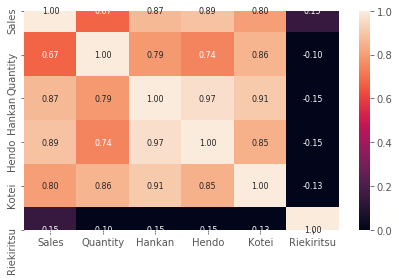

In [192]:
# 相関係数を算出
corr = np.corrcoef(df5.values.T)

# ヒートマップとして可視化
hm   = sns.heatmap(
                 corr,                         # データ
                 annot=True,                   # セルに値入力
                 fmt='.2f',                    # 出力フォーマット
                 annot_kws={'size': 8},# セル入力値のサイズ
    vmin=0,
    vmax=1,
                 yticklabels=list(df5.columns), # 列名を出力
                 xticklabels=list(df5.columns)) # x軸を出力

plt.tight_layout()
plt.show()

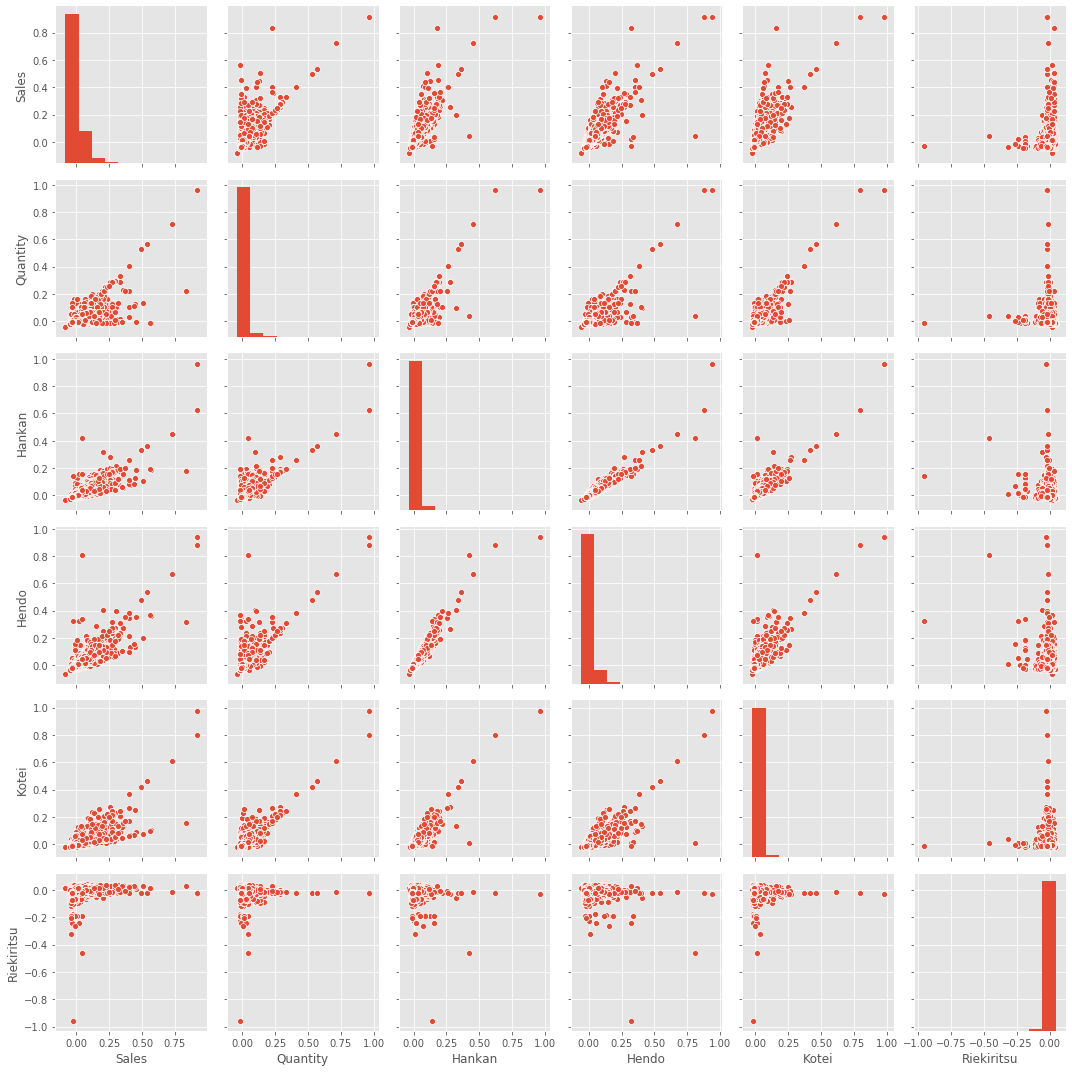

In [193]:
# 目的変数（Riekiritsu)と相関が強い変数を散布図として可視化
sns.pairplot(df46[['Sales','Quantity','Hankan','Hendo','Kotei', 'Riekiritsu']])
plt.tight_layout()
plt.show()

## 単回帰の散布図を描く

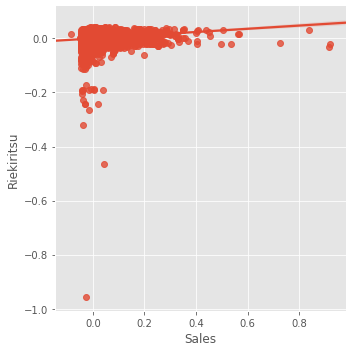

In [194]:
# 目的変数(Riekiritsu)と相関が強い変数を選択し可視化
sns.lmplot("Sales","Riekiritsu",data=df46)
plt.tight_layout()
plt.show()

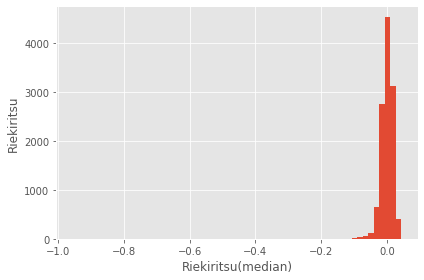

In [195]:
# 目的変数(MEDV)のヒストグラムを表示
plt.hist(df46.Riekiritsu,bins=60)
plt.xlabel("Riekiritsu(median)")
plt.ylabel("Riekiritsu")
plt.tight_layout()
plt.show()